## Credit Risk Model

### Explanatory data analysis

#### Importing necessary libraries

In [1]:
import os
import sys

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sys.path.append(os.path.abspath('../scripts'))

from Utils import DataUtils
from Plotting import Plots

data_utils = DataUtils()
plotting = Plots()

#### Overview of the Data

In [3]:
filepath = '../data/data.csv'

data = data_utils.load_data(filepath)
data.head()

2024-10-04 16:20 - DEBUG :: Loading data from file...


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


#### Value counts for different IDs

In [4]:
data['CustomerId'].nunique(), data['AccountId'].nunique(), data['SubscriptionId'].nunique()

(3742, 3633, 3627)

In [5]:
data['BatchId'].nunique(), data['TransactionId'].nunique()

(94809, 95662)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

#### Summary Statistics

In [7]:
data.describe()

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


**Observation**
- We can see that the country code for all columns is the same
- Most of the pricing strategy is 2.


#### Distribution of Numerical Features

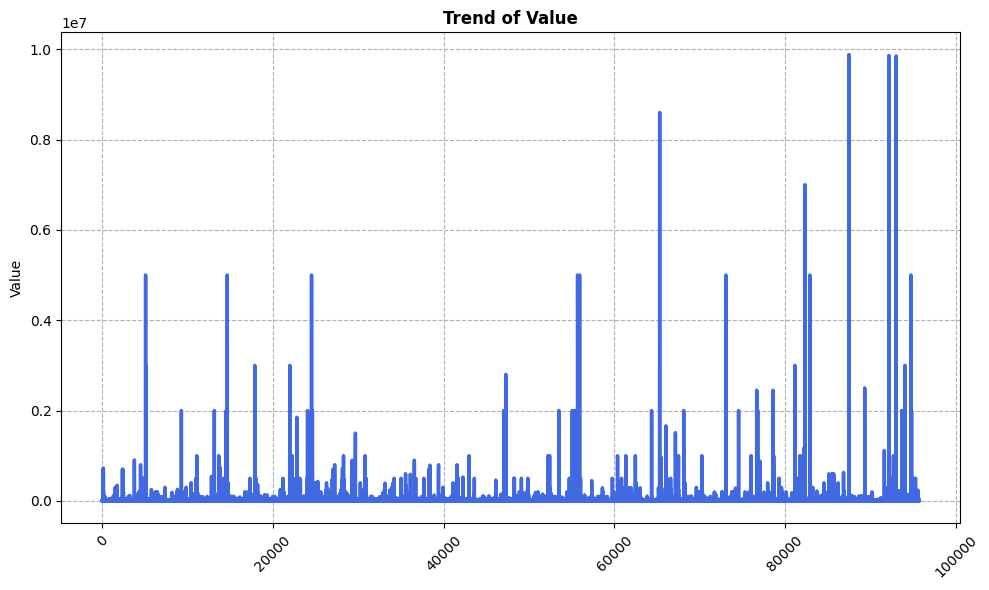

In [10]:
plotting.trend_col(data, 'Value')

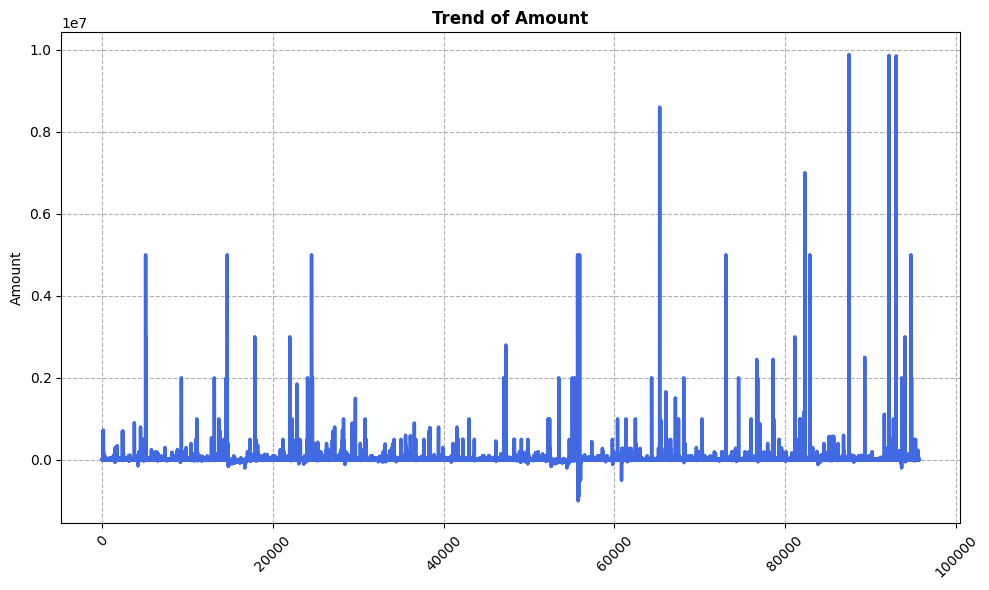

In [9]:
plotting.trend_col(data, 'Amount')

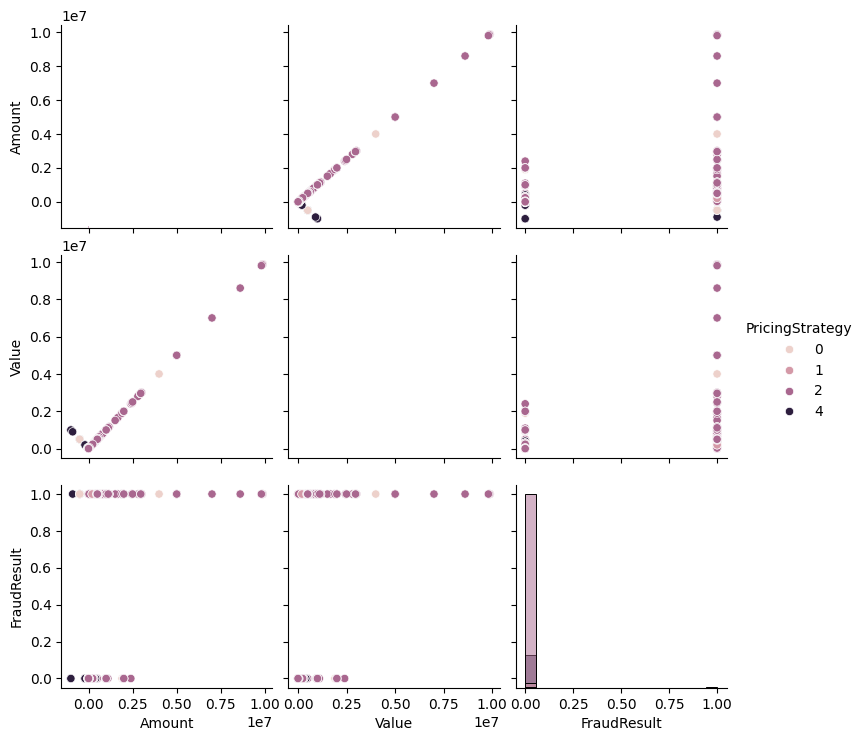

In [21]:
num_cols = ['Amount', 'Value', 'PricingStrategy','FraudResult']
sns.pairplot(data=data[num_cols], hue='PricingStrategy', diag_kind="hist")

#### Distribution of Categorical Features

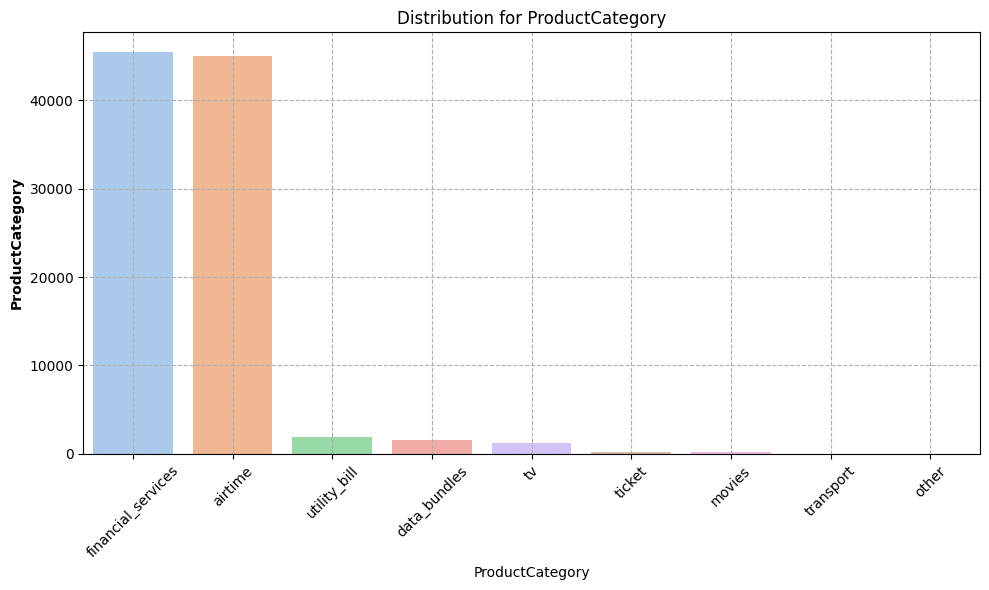

In [10]:
plotting.cat_distribution(data, 'ProductCategory')

**Observation**: 
- From the distribution of product categories, we can see that financial services and airtime account for the majority of the categories.


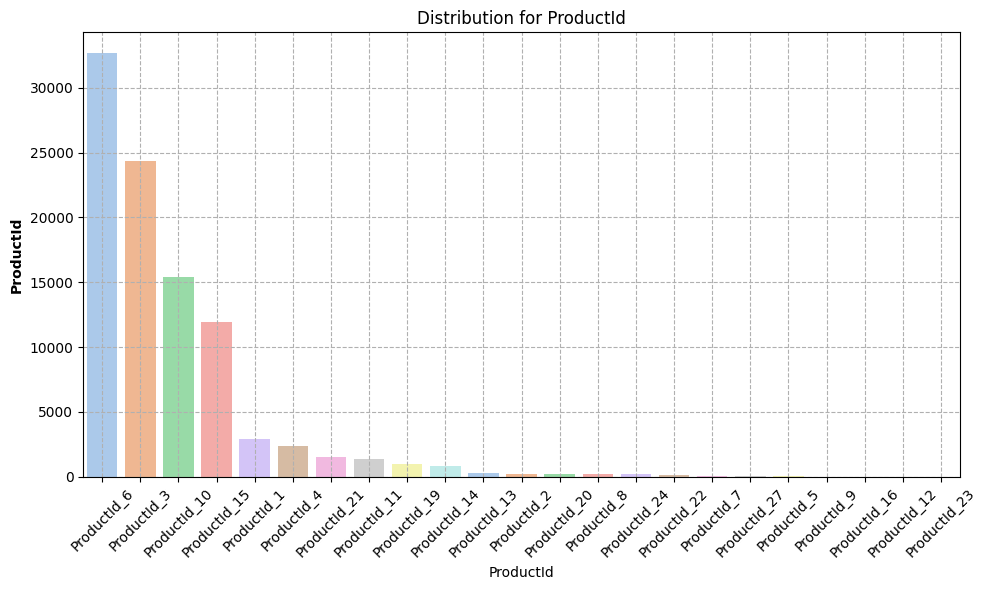

In [9]:
plotting.cat_distribution(data, 'ProductId')

#### Top 10 customers that have a lot of transactions

2024-10-04 02:56 - DEBUG :: plotting categorical distribution...


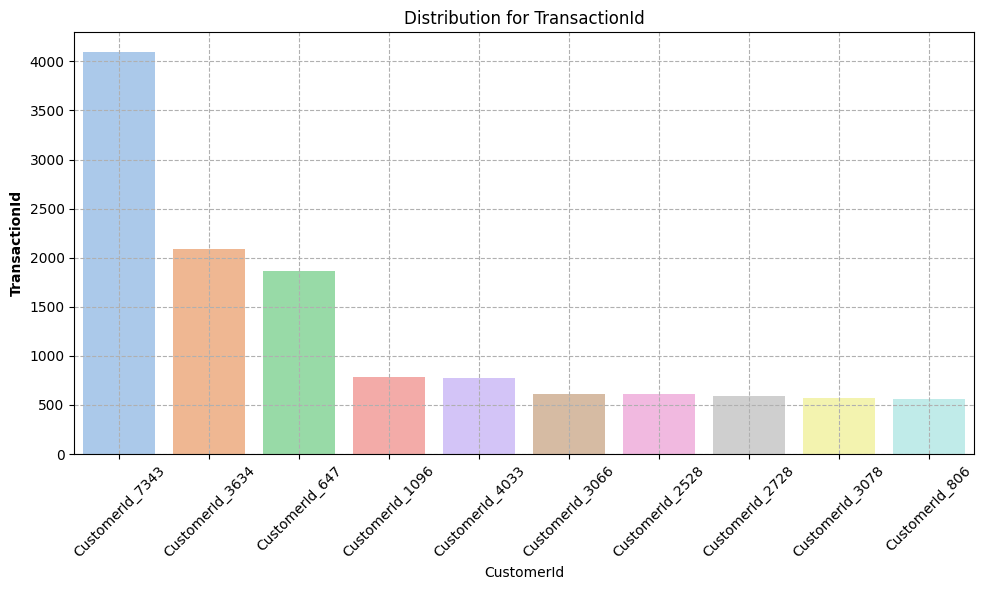

In [17]:
customers_Transactions_10 = pd.DataFrame(data.groupby(by='CustomerId')['TransactionId'].size().nlargest(10))
plotting.cat_distribution(customers_Transactions_10, 'TransactionId', value_count=False)

#### Top 10 customers that have a lot of Absolute value of the amount transacted

2024-10-04 02:57 - DEBUG :: plotting categorical distribution...


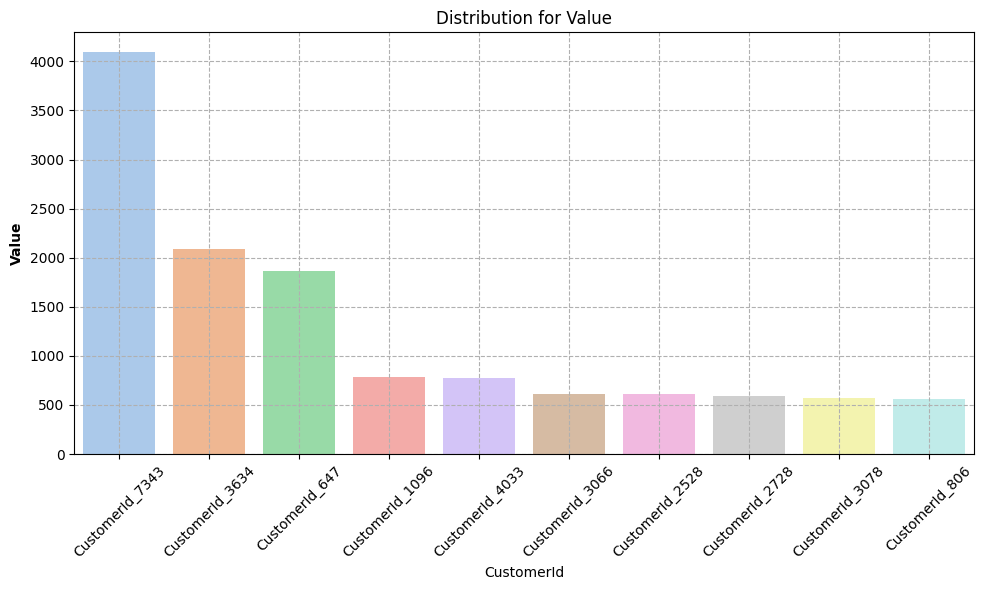

In [20]:
customers_Value_10 = pd.DataFrame(data.groupby(by='CustomerId')['Value'].size().nlargest(10))
plotting.cat_distribution(customers_Value_10, 'Value', value_count=False)

#### Values of transaction per fraud result

2024-10-04 03:09 - DEBUG :: plotting categorical distribution...
2024-10-04 03:09 - INFO :: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-10-04 03:09 - INFO :: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


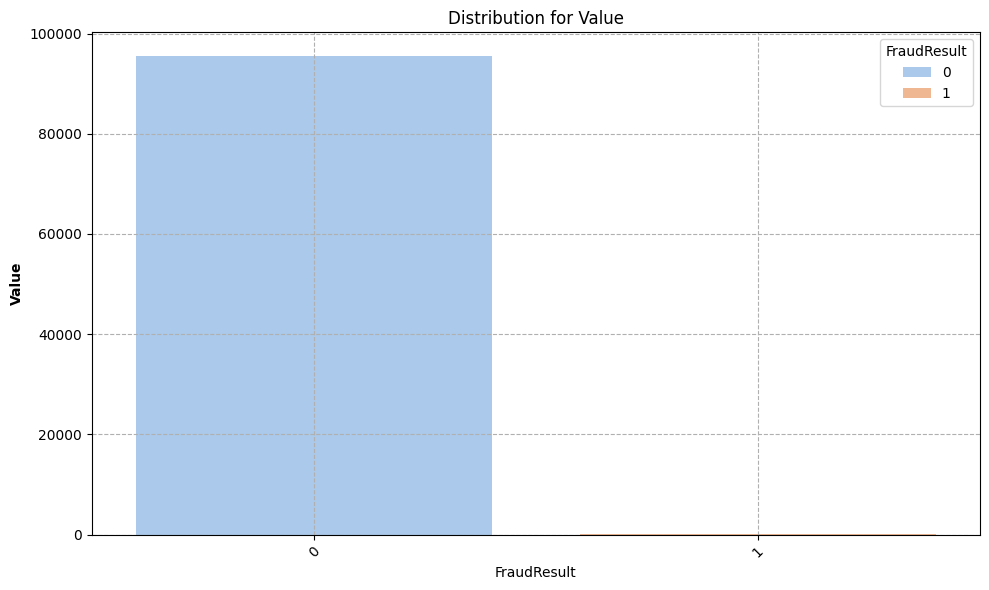

In [23]:
fraud_Value_10 = pd.DataFrame(data.groupby(by='FraudResult')['Value'].size())
plotting.cat_distribution(fraud_Value_10, 'Value', value_count=False)

**Observation**
- Most of the value transacted are not fraudlent 

#### Values of transaction per pricing strategy

2024-10-04 03:10 - DEBUG :: plotting categorical distribution...
2024-10-04 03:10 - INFO :: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-10-04 03:10 - INFO :: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


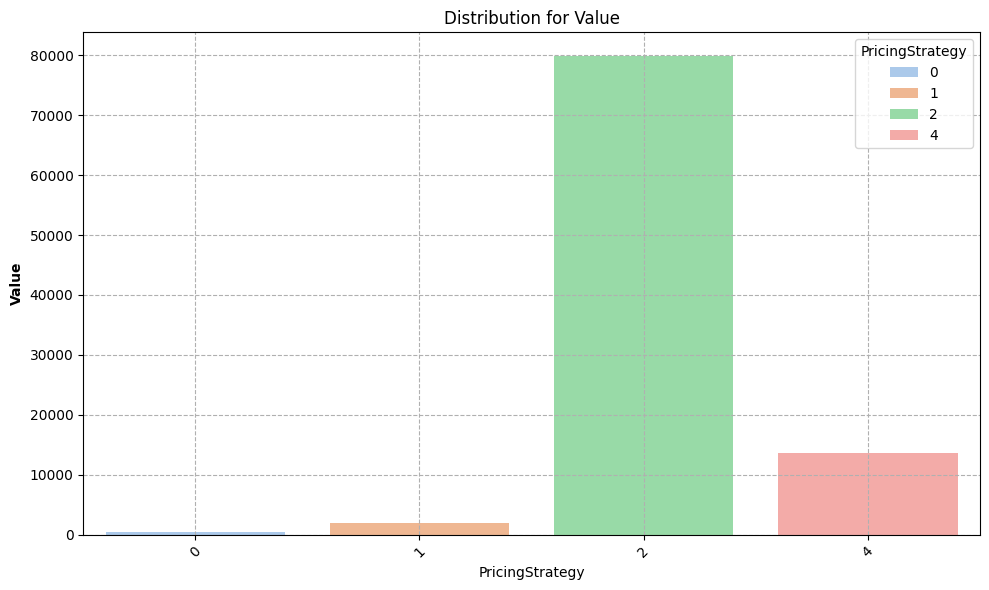

In [24]:
strategy_Value_10 = pd.DataFrame(data.groupby(by='PricingStrategy')['Value'].size())
plotting.cat_distribution(strategy_Value_10, 'Value', value_count=False)

**Observation**
- This figure shows the values of transactions per pricing strategy, and we can see that pricing strategy number 2 is a dominating strategy.

#### Correlation Analysis

2024-10-04 02:19 - DEBUG :: Plotting Heatmap for numerical columns
2024-10-04 02:19 - DEBUG :: locator: <matplotlib.ticker.AutoLocator object at 0x0000017D64741D90>


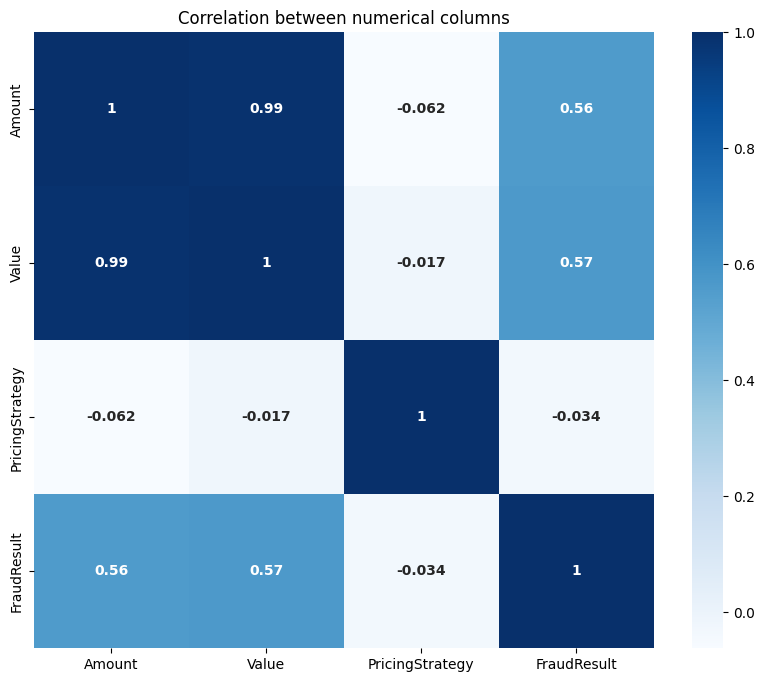

In [13]:
num_cols = ['Amount', 'Value', 'PricingStrategy','FraudResult']
plotting.visualize_correlations(data, num_cols)

**Observation**: 
- There is a significant correlation between the value and the amount transacted. Since they are highly correlated, one of these columns should be dropped before training our machine learning models to avoid redundancy.


#### Identifying Missing Values


In [7]:
# Info about missing values
data_info = data_utils.data_info(data)


Dataset Overview
---------------------
- Total rows: 95662
- Total columns: 16

No Duplicated data found in the dataset.

No missing data found in the dataset.

Detailed Missing Data Information
Empty DataFrame
Columns: [Missing Values, Missing Percentage, Data Types]
Index: []


#### Outlier Detection

2024-10-03 10:46 - DEBUG :: Plotting Outliers...


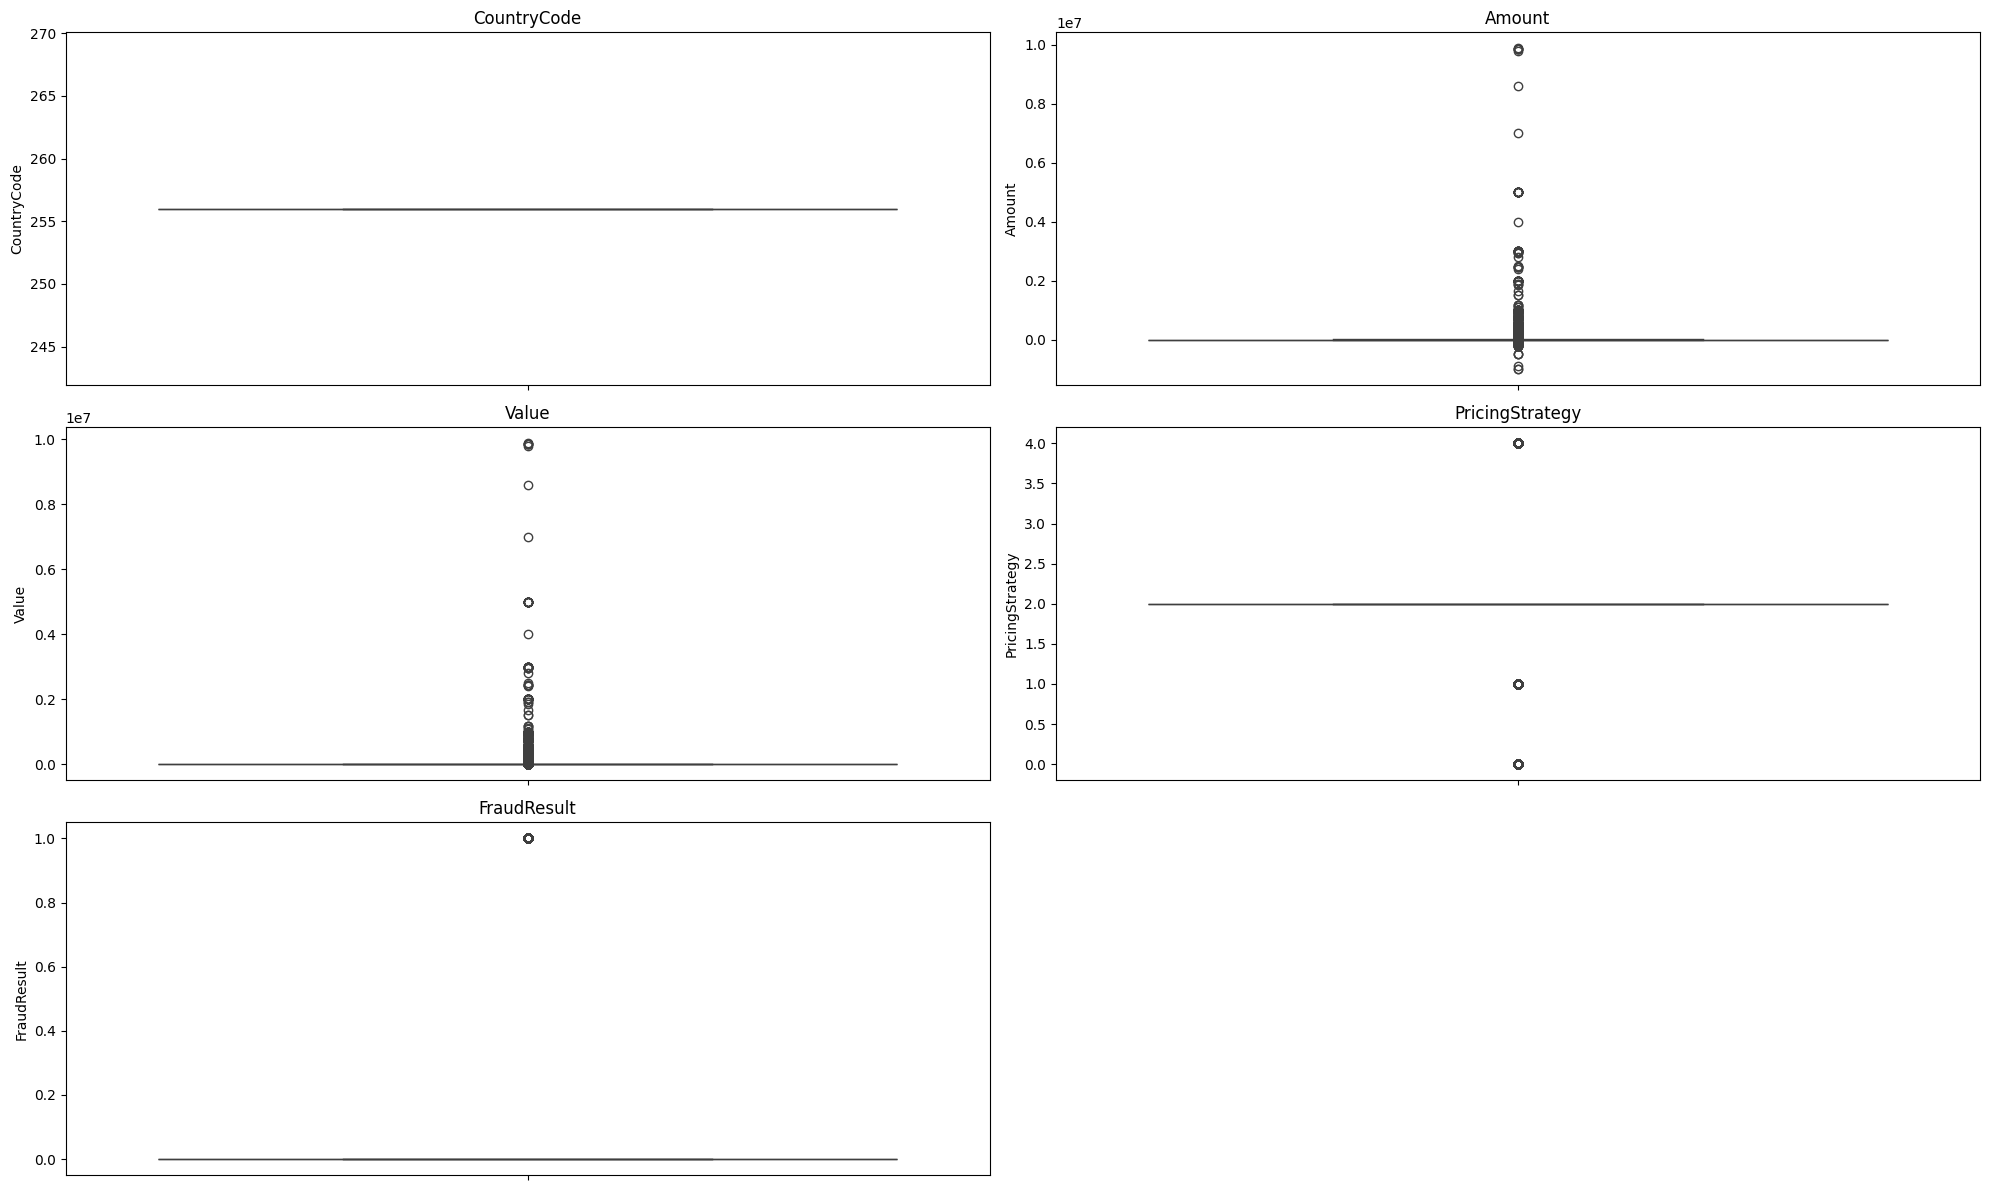

In [8]:
plotting.visualize_outliers(data)